# Linkedin Reviews Sentiment Analysis 

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("C:\\Users\\saurabh\\Desktop\\Newdat\\linkedin-reviews.csv")

In [4]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\Users\saurabh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


# Exploratory Data Analysis 


# Plotting the Distribution of Ratings 

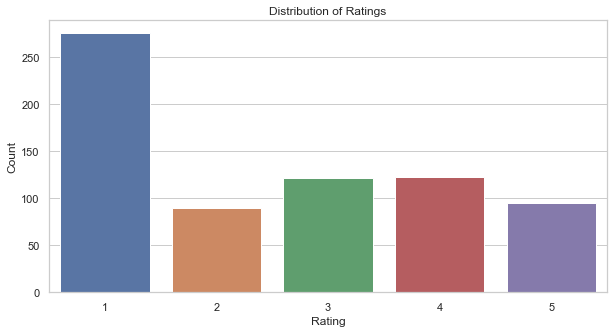

In [14]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10,5))
sns.countplot(data = df , x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [16]:
df['Rating'].value_counts()

1    275
4    122
3    121
5     95
2     89
Name: Rating, dtype: int64

# Adding Sentiment Labrels in Data 

We will use TextBlob library . Textblob provides a polarity scores ranging from -1(very negative) to +1(very positive) for a given text . We can use this score to classify each review's sentiment as positive , negative or neutral . 

In [17]:
# !pip install textblob 

In [19]:
from textblob import TextBlob

In [22]:
def my_text(review):
    sentiment = TextBlob(review).sentiment 
    if sentiment.polarity > 0.1 :
        return 'Positive'
    elif sentiment.polarity < -0.1 :
        return 'Negative'
    else :
        return 'Neutral'

In [23]:
df['Sentiment'] = df['Review'].apply(my_text)

In [24]:
df.head(6)

,Review,Rating,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,Negative
1,Force close(galaxy tab),1,Neutral
2,Slow and it tries to upload your contacts with...,1,Negative
3,Add ability to customize the profile and move ...,4,Neutral
4,"Good app, but it's a pain that it's not possib...",4,Positive
5,This app is poor and bad. Linkedin app on my H...,1,Negative


# Analyzing App Reviews Sentiments 

In [25]:
sen_dist = df['Sentiment'].value_counts()
sen_dist

Positive    298
Neutral     297
Negative    107
Name: Sentiment, dtype: int64

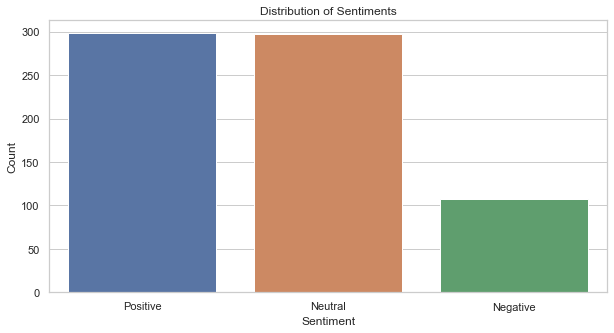

In [27]:
plt.figure(figsize = (10,5))
sns.barplot(x = sen_dist.index,
           y = sen_dist.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# So , we can see althrough the app has low ratings . still the reviews don't use many negative words in the reviews for the app . 

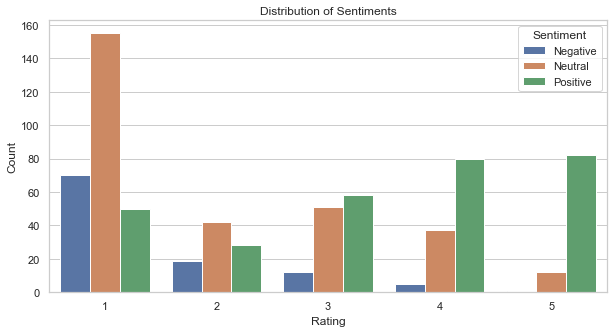

In [28]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
            x = 'Rating',
           hue = 'Sentiment')
plt.title('Distribution of Sentiments')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Summary :
    Linkedin App reviews sentiment analysis is a valuable tool for business to understand user feedback , prioritize feature updates and maintain a positive user community . 